In [1]:
from keras.models import Sequential
from keras.layers import Activation, Dense, MaxPooling1D, Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.normalization import BatchNormalization
import numpy
import sys
from matplotlib import pyplot

C:\Users\ayses\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:

# fix random seed for reproducibility
numpy.random.seed(7)

# load input dataset
dataset = numpy.loadtxt("tez_input_data.data", delimiter=",")

# split into input (X) variables
#InputValues = dataset.T
InputValues = dataset
nrows, ncols = InputValues.shape
InputValues = InputValues.reshape(nrows, ncols, 1)
print(InputValues.shape)

# load output dataset
dataset = numpy.loadtxt("tez_output_data.data", delimiter=",")
#OutputValues = dataset.T
OutputValues = dataset
nrows, ncols = OutputValues.shape
OutputValues = OutputValues.reshape(nrows, ncols)
print(OutputValues.shape)

print("data loaded")



(7451, 1200, 1)
(7451, 1200)
data loaded


In [3]:
model = Sequential()

model.add(Conv1D(kernel_size = 3, filters = 50, input_shape=(1200,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(1, padding='same'))

#c2
model.add(Conv1D(kernel_size = (1), filters = 50))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(1, padding='same'))

#c3
model.add(Conv1D(kernel_size = (1), filters = 50))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(1, padding='same'))

model.add(Flatten())

model.add(Dense(200, activation='relu'))
model.add(Dense(1200, activation='softmax'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 1200, 50)          200       
_________________________________________________________________
batch_normalization_1 (Batch (None, 1200, 50)          200       
_________________________________________________________________
activation_1 (Activation)    (None, 1200, 50)          0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1200, 50)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 1200, 50)          2550      
_________________________________________________________________
batch_normalization_2 (Batch (None, 1200, 50)          200       
_________________________________________________________________
acti

In [4]:
print("running")

# Fit the model
history = model.fit(InputValues, OutputValues, epochs=20, batch_size=10, verbose=2)


# evaluate the model
scores = model.evaluate(InputValues, OutputValues)
print("\nevaluate -> %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))



running
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
 - 145s - loss: 0.0931 - acc: 0.9821
Epoch 2/20
 - 145s - loss: 0.0861 - acc: 0.9821
Epoch 3/20
 - 147s - loss: 0.0836 - acc: 0.9821
Epoch 4/20
 - 145s - loss: 0.0821 - acc: 0.9821
Epoch 5/20
 - 145s - loss: 0.0810 - acc: 0.9821
Epoch 6/20
 - 144s - loss: 0.0798 - acc: 0.9821
Epoch 7/20
 - 143s - loss: 0.0788 - acc: 0.9821
Epoch 8/20
 - 144s - loss: 0.0779 - acc: 0.9821
Epoch 9/20
 - 144s - loss: 0.0771 - acc: 0.9821
Epoch 10/20
 - 144s - loss: 0.0764 - acc: 0.9821
Epoch 11/20
 - 144s - loss: 0.0758 - acc: 0.9821
Epoch 12/20
 - 143s - loss: 0.0752 - acc: 0.9821
Epoch 13/20
 - 143s - loss: 0.0749 - acc: 0.9821
Epoch 14/20
 - 146s - loss: 0.0743 - acc: 0.9821
Epoch 15/20
 - 151s - loss: 0.0740 - acc: 0.9821
Epoch 16/20
 - 148s - loss: 0.0737 - acc: 0.9821
Epoch 17/20
 - 149s - loss: 0.0735 - acc: 0.9821
Epoch 18/20
 - 149s - loss: 0.0732 - acc: 0.9821
Epoch 19/20
 - 150s - loss: 0.0730 - acc: 0.9821
Epoch 20/20
 - 144s - 

dict_keys(['loss', 'acc'])


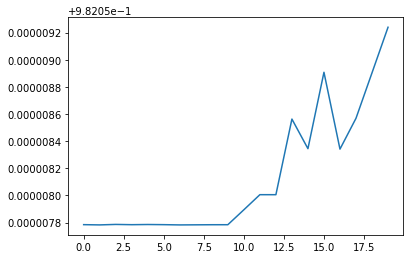

In [5]:
print(history.history.keys())

pyplot.plot(history.history['acc'])
pyplot.show()

In [ ]:
#test


# load input dataset
dataset = numpy.loadtxt("tez_input_testdata_1.data", delimiter=",")

# split into input (X) variables
InputTestValues = dataset
nrows, ncols = InputTestValues.shape
InputTestValues = InputTestValues.reshape(nrows, ncols, 1)
print(InputTestValues.shape)

# load output dataset
dataset = numpy.loadtxt("tez_output_testdata_1.data", delimiter=",")
OutputTestValues = dataset
nrows, ncols = OutputTestValues.shape
OutputTestValues = OutputTestValues.reshape(nrows, ncols)
print(OutputTestValues.shape)

print("test data loaded")

# calculate predictions
predictions = model.predict(InputTestValues)

result = numpy.zeros(shape=(nrows, ncols))
print(result.shape)

for j in range(len(predictions)):
    for i in range(len(predictions[0])):
        if predictions[j][i] * 100 > 1: 
            result[j][i] = 1
        else:
            result[j][i] = 0
            

for j in range(len(result)):
    print("%d Y:%d R:%d" % (OutputTestValues[j], result[j]))
                    
            
numpy.savetxt("tez_predict_data.data", result, fmt='%1d', delimiter='\t', newline='\n', header='', footer='', comments='# ', encoding=None)
           
